# 1D Heisenberg Model
1D Heisenberg Model with Tenpy

In [1]:
# Import Libraries

import numpy as np
import scipy
import matplotlib.pyplot as plt
from pprint import pprint

np.set_printoptions(precision=5, suppress=True, linewidth=100)

import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import tebd, dmrg, tdvp
from tenpy.networks.site import SpinHalfSite, SpinSite, FermionSite
from tenpy.networks.mps import MPS
from tenpy.models.tf_ising import TFIChain
from tenpy.algorithms import dmrg

tenpy.tools.misc.setup_logging(to_stdout="INFO")

import tenpy.linalg.np_conserved as npc
from tenpy.networks.site import SpinHalfSite
from tenpy.networks.mps import MPS
from tenpy.networks.mpo import MPO
from tenpy.networks.site import SpinSite
from tenpy.models.lattice import Chain
from tenpy.models.model import CouplingModel, NearestNeighborModel, MPOModel
from tenpy.models.spins import SpinModel
from tenpy.models import lattice

In [2]:
spin = SpinHalfSite(conserve="Sz")
Sz = spin.Sz

In [3]:
N = 10
model = TFIChain({"L": N, "J": 1., "g": 1., "bc_MPS": "finite"})
sites = model.lat.mps_sites()
psi = MPS.from_product_state(sites, ['up'] * N, "finite")
dmrg_params = {"trunc_params": {"chi_max": 100, "svd_min": 1.e-10}, "mixer": True}
info = dmrg.run(psi, model, dmrg_params)
print("E =", info['E'])
print("max. bond dimension =", max(psi.chi))

INFO    : TFIChain: reading 'bc_MPS'='finite'
INFO    : TFIChain: reading 'L'=10
INFO    : TFIChain: reading 'J'=1.0
INFO    : TFIChain: reading 'g'=1.0
INFO    : DMRG: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : DMRG: reading 'mixer'=True
INFO    : activate DensityMatrixMixer with initial amplitude 1e-05
INFO    : Running sweep with optimization
INFO    : trunc_params: reading 'chi_max'=100
INFO    : trunc_params: reading 'svd_min'=1e-10
INFO    : checkpoint after sweep 1
energy=-12.3814899996540024, max S=0.3769920957020116, age=10, norm_err=3.1e-02
Current memory usage 174.9MB, wall time: 0.5s
Delta E = nan, Delta S = 3.2977e-01 (per sweep)
max trunc_err = 6.2556e-21, max E_trunc = 2.3093e-14
chi: [2, 4, 8, 11, 12, 12, 8, 4, 2]
INFO    : Running sweep with optimization
INFO    : checkpoint after sweep 2
energy=-12.3814899996547521, max S=0.3790524054180356, age=10, norm_err=6.0e-12
Current memory usage 179.9MB, wall time: 0.7s
Delta E = -7.4962e-13, Delta 

In [4]:
g_arr = np.linspace(0, 2, 100)

def sim(g):
    N = 10
    model = TFIChain({"L": N, "J": 1, "g": g, "bc_MPS": "finite"})
    sites = model.lat.mps_sites()
    psi = MPS.from_product_state(sites, ['up'] * N, "finite")
    dmrg_params = {"trunc_params": {"chi_max": 100, "svd_min": 1.e-10}, "mixer": True}
    info = dmrg.run(psi, model, dmrg_params)
    return np.mean(psi.expectation_value("Sz"))

Sz_arr = np.array([sim(g) for g in g_arr])

INFO    : TFIChain: reading 'bc_MPS'='finite'
INFO    : TFIChain: reading 'L'=10
INFO    : TFIChain: reading 'J'=1
INFO    : TFIChain: reading 'g'=0.0
INFO    : DMRG: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : DMRG: reading 'mixer'=True
INFO    : activate DensityMatrixMixer with initial amplitude 1e-05
INFO    : Running sweep with optimization
INFO    : trunc_params: reading 'chi_max'=100
INFO    : trunc_params: reading 'svd_min'=1e-10
INFO    : lanczos_params: setting 'P_tol'=5.0000000000000005e-22
INFO    : checkpoint after sweep 1
energy=-9.0000000000000000, max S=0.6931471805599527, age=10, norm_err=5.7e-15
Current memory usage 186.1MB, wall time: 0.1s
Delta E = nan, Delta S = 6.9315e-01 (per sweep)
max trunc_err = 3.6082e-21, max E_trunc = 5.3291e-15
chi: [2, 2, 2, 3, 3, 3, 2, 3, 2]
INFO    : Running sweep with optimization
INFO    : checkpoint after sweep 2
energy=-9.0000000000000089, max S=0.6931471805599494, age=10, norm_err=5.2e-15
Current memory us

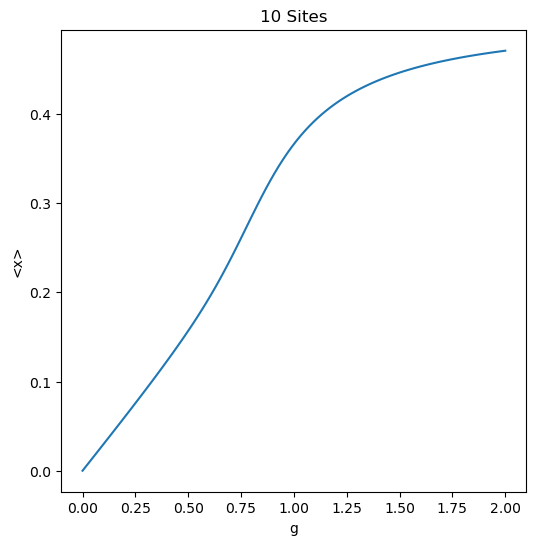

In [5]:
plt.figure(figsize=(6, 6))
plt.plot(g_arr, Sz_arr)
plt.title("10 Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

In [6]:
g_arr = np.linspace(0, 2, 100)

def sim(g):
    N = 2
    model = TFIChain({"L": N, "J": 1, "g": g, "bc_MPS": "infinite"})
    sites = model.lat.mps_sites()
    psi = MPS.from_product_state(sites, ['up'] * N, "infinite")
    dmrg_params = {"trunc_params": {"chi_max": 100, "svd_min": 1.e-10}, "mixer": True}
    info = dmrg.run(psi, model, dmrg_params)
    return np.mean(psi.expectation_value("Sz"))

Sz_arr = np.array([sim(g) for g in g_arr])

INFO    : TFIChain: reading 'bc_MPS'='infinite'
INFO    : TFIChain: reading 'L'=2
INFO    : TFIChain: reading 'J'=1
INFO    : TFIChain: reading 'g'=0.0
INFO    : DMRG: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : start environment_sweep
INFO    : trunc_params: reading 'chi_max'=100
INFO    : trunc_params: reading 'svd_min'=1e-10
INFO    : DMRG: reading 'mixer'=True
INFO    : activate DensityMatrixMixer with initial amplitude 1e-05
INFO    : Running sweep with optimization
INFO    : lanczos_params: setting 'P_tol'=5.0000000000000005e-22
INFO    : start environment_sweep
INFO    : checkpoint after sweep 10
energy=-0.9999999999999858, max S=0.6931471805599576, age=128, norm_err=5.3e-16
Current memory usage 186.1MB, wall time: 0.4s
Delta E = nan, Delta S = 6.9315e-02 (per sweep)
max trunc_err = 3.9093e-21, max E_trunc = 2.8422e-14
chi: [2, 2]
INFO    : Running sweep with optimization
INFO    : start environment_sweep
INFO    : checkpoint after sweep 20
energy=-0.9

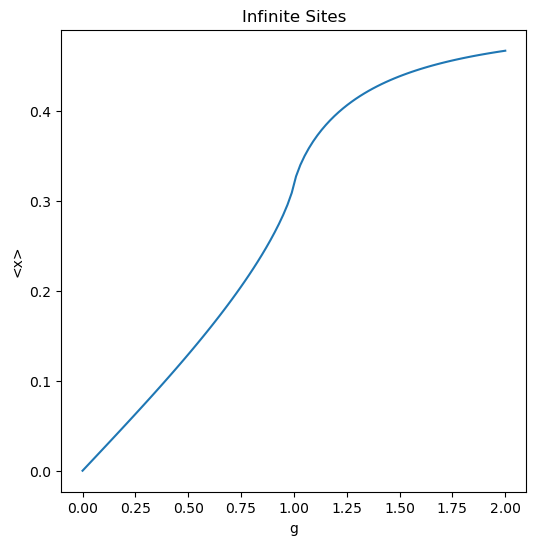

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(g_arr, Sz_arr)
plt.title("Infinite Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()

In [ ]:
g_arr = np.linspace(0, 100000, 1000)

def sim(g):
    N = 2
    model = TFIChain({"L": N, "J": 1, "g": g, "bc_MPS": "infinite"})
    sites = model.lat.mps_sites()
    psi = MPS.from_product_state(sites, ['up'] * N, "infinite")
    dmrg_params = {"trunc_params": {"chi_max": 100, "svd_min": 1.e-10}, "mixer": True}
    info = dmrg.run(psi, model, dmrg_params)
    return np.mean(psi.expectation_value("Sz"))

Sz_arr = np.array([sim(g) for g in g_arr])

INFO    : TFIChain: reading 'bc_MPS'='infinite'
INFO    : TFIChain: reading 'L'=2
INFO    : TFIChain: reading 'J'=1
INFO    : TFIChain: reading 'g'=0.0
INFO    : DMRG: subconfig 'trunc_params'=Config(<2 options>, 'trunc_params')
INFO    : start environment_sweep
INFO    : trunc_params: reading 'chi_max'=100
INFO    : trunc_params: reading 'svd_min'=1e-10
INFO    : DMRG: reading 'mixer'=True
INFO    : activate DensityMatrixMixer with initial amplitude 1e-05
INFO    : Running sweep with optimization
INFO    : lanczos_params: setting 'P_tol'=5.0000000000000005e-22
INFO    : start environment_sweep
INFO    : checkpoint after sweep 10
energy=-0.9999999999999858, max S=0.6931471805599576, age=128, norm_err=5.3e-16
Current memory usage 551.1MB, wall time: 0.4s
Delta E = nan, Delta S = 6.9315e-02 (per sweep)
max trunc_err = 3.9093e-21, max E_trunc = 2.8422e-14
chi: [2, 2]
INFO    : Running sweep with optimization
INFO    : start environment_sweep
INFO    : checkpoint after sweep 20
energy=-0.9

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(g_arr, Sz_arr)
plt.title("Infinite Sites")
plt.xlabel("g")
plt.ylabel("<x>")
plt.show()